In [1]:
# loss function ---> mean squared error

import numpy as np
def mean_squared_error(y,t):
    return (1/2)*(np.sum((y-t)**2))

t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

0.09750000000000003
0.5975


In [2]:
# loss function ---> cross entropy error

import numpy as np
def cross_entropy_error(y,t):
    # need delta because np.log(0)=-inf (delta means a very small number)
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


In [3]:
# Little batch learning

import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]
print(np.random.choice(60000,10))

(60000, 784)
(60000, 10)
[58670 42595 57788 44902 30371 39010  9976 46163 48363 32590]


In [4]:
# one or batch learning
# cross entropy error
import numpy as np
from dataset.mnist import load_mnist
def cross_entropy_error(y,t):
    if y.ndim==1:
        y=y.reshape(1,y.size)
        t=t.reshape(1,t.size)
    batch=y.shape[0]
    delta=1e-7
    return -(1/batch)*np.sum(t*np.log(y+delta))

In [5]:
import numpy as np
t = np.array([[2],[3]])
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],[0.1, 0.05, 0.0, 0.7, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]])

batch_size = y.shape[0]
print(batch_size)
print(np.arange(batch_size))

print(y[np.array([0]), np.array([2])])

2
[0 1]
[0.6]


In [6]:
# numerical differentation
# rounding error
import numpy as np
def numerical_diff(f,x):
    h=10e-50
    return(f(x+h)-f(x))/h
print(np.float32(1e-50))

0.0


In [7]:
# numerical differentation
import numpy as np
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

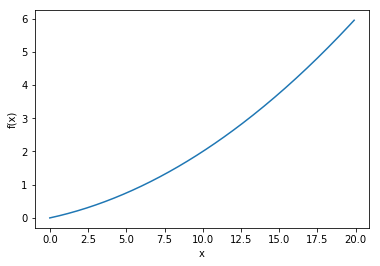

0.1999999999990898
0.2999999999986347


In [19]:
import numpy as np
import matplotlib.pylab as plt
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)
def function1(x):
    return 0.01*x**2+0.1*x
x=np.arange(0.0,20.0,0.1)
y=function1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()
print(numerical_diff(function1,5))
print(numerical_diff(function1,10))

In [9]:
# partial numerical differentation
def function2(x):
    return x[0]**2+x[1]**2

def function_temp1(x0):
    return x0*x0+4.0**2.0
print(numerical_diff(function_temp1,3))
def function_temp2(x1):
    return 3.0**2.0+x1*x1
print(numerical_diff(function_temp2,4))

6.00000000000378
7.999999999999119


In [10]:
# gradient
import numpy as np
def function2(x):
    return x[0]**2+x[1]**2
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)
    for idx in range(x.size):
        tmp=x[idx]
        x[idx]=tmp+h
        fxh1=f(x)
        
        x[idx]=tmp-h
        fxh2=f(x)
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp
    return grad
print(numerical_gradient(function2,np.array([3.0,4.0])))
print(numerical_gradient(function2,np.array([0.0,2.0])))
print(numerical_gradient(function2,np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [11]:
# gradient descent
import numpy as np
def function2(x):
    return x[0]**2+x[1]**2
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)
    for idx in range(x.size):
        tmp=x[idx]
        x[idx]=tmp+h
        fxh1=f(x)
        
        x[idx]=tmp-h
        fxh2=f(x)
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp
    return grad
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x
print(gradient_descent(function2,np.array([3.0,4.0]),lr=0.1,step_num=100))

[6.11110793e-10 8.14814391e-10]


In [12]:
# gradient descent
# lr too large
print(gradient_descent(function2,np.array([3.0,4.0]),lr=10.0,step_num=100))

[ 2.58983747e+13 -1.29524862e+12]


In [13]:
# gradient descent
# lr too small
print(gradient_descent(function2,np.array([3.0,4.0]),lr=1e-10,step_num=100))

[2.99999994 3.99999992]


In [14]:
# simple net
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.02737284  0.51224363 -0.53961647]
 [ 0.04105926  0.76836545 -0.80942471]]


In [1]:
# two layer net class
import numpy as np
from functions import *
from gradient import numerical_gradient

class twolayernet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [3]:
net=twolayernet(input_size=784,hidden_size=100,output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [4]:
x=np.random.rand(100,784)
y=net.predict(x)
print(y)

[[0.09595568 0.11003978 0.09723213 0.1063434  0.09428568 0.10146014
  0.10547546 0.10168134 0.08774367 0.09978272]
 [0.09619192 0.10948416 0.0969677  0.10611441 0.09434388 0.1017556
  0.10545318 0.10186663 0.08773837 0.10008415]
 [0.09624855 0.10942596 0.09676414 0.10611228 0.09445955 0.10191142
  0.10526218 0.10177268 0.08818303 0.09986021]
 [0.09619814 0.10958402 0.09680399 0.10673075 0.09406141 0.10181977
  0.10536756 0.10177924 0.08782046 0.09983467]
 [0.09609143 0.10935968 0.09695593 0.10643619 0.09416967 0.10193103
  0.10526377 0.10170353 0.08813566 0.09995311]
 [0.09660481 0.10950283 0.09700537 0.10643961 0.09421432 0.10165904
  0.10510169 0.10164234 0.08799657 0.09983342]
 [0.09636989 0.10978328 0.09649826 0.10623308 0.09466042 0.10194298
  0.10512242 0.10136259 0.08827501 0.09975207]
 [0.09612138 0.10935792 0.09697778 0.10632568 0.09458079 0.10161735
  0.10557895 0.10145888 0.08792822 0.10005307]
 [0.0962214  0.1096367  0.09653776 0.10645812 0.09446491 0.10169003
  0.10551385 

In [18]:
x=np.random.rand(10,784)
t=np.random.rand(10,10)
grads=net.numerical_gradient(x,t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
# train two layer net
# random little batch ---> stochastic gradient descent
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = twolayernet(input_size=784, hidden_size=50, output_size=10)

iters_num = 200
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        print(i   )
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
